# Name:-Mahendra Singam

# The Spark Foundation

# Technical Task 1:- Predicting the Scores of a student based on study hours.

In this task we will predict the percentage that a student is expected to score based on the number of hours of study.This is we will use simple linear regression as it involve just two variables(Scores and hours)

# Here,we start by importing the packages and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
dataset=pd.read_csv("student.csv")

In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Discovering the data insights to check attributes such as null values,datatypes,etc.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Here we explore summary of statistics like total count of variables,minimum and maximum values,mean,25%,50% and so on

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.shape

(25, 2)

# Scatter plot which shows the relation between No. of hours studied and Percentage scored by a student

<AxesSubplot:title={'center':'Hours Vs Percentage Scored Scatter plot'}, xlabel='No. of hours', ylabel='Percentage Scored'>

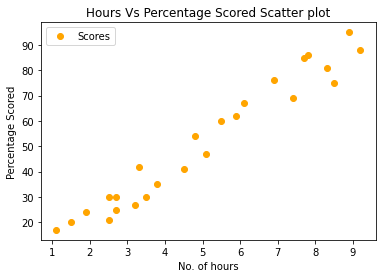

In [8]:
dataset.plot(x="Hours", y="Scores", xlabel="No. of hours", ylabel="Percentage Scored",style="o",
             c="orange", title="Hours Vs Percentage Scored Scatter plot")

# Here we divide the data into features(inputs) and labels(outputs)

In [9]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# Here,we are splitting the original dataset into test and train dataset.

Here training dataset consist of 70% and testing dataset consist of 305 of original dataset.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Here we are training our model on the train dataset

The values taken from the training dataset are trained using linear model algorithm.

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

# For plotting our linear regression line we compute the coefficient and intercept values. 

In [13]:
model.coef_

array([9.78856669])

In [14]:
model.intercept_

2.370815382341881

In [15]:
line=model.coef_*x+model.intercept_

# Here,we are visualizing the result of the model that we have trained on training dataset.

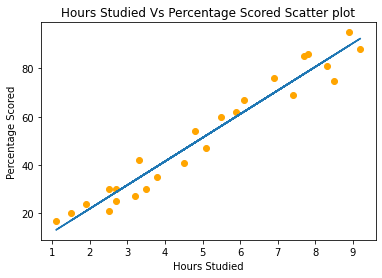

In [16]:
plt.scatter(x,y,color="orange")
plt.title("Hours Studied Vs Percentage Scored Scatter plot")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.plot(x,line)
plt.show()

In [17]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


# Printing the predicted values and comparing with the actual values.

In [18]:
y_pred=model.predict(x_test)

In [19]:
data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Now,we check for the results

In [20]:
hours=[9.25]
own_pred=model.predict([hours])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = [9.25]
Predicted Score = 92.91505723477056


In [21]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Absolute Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Absolute Error: 4.792191274636315
